In [14]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import axes3d
%config InlineBackend.figure_format = 'svg'
plt.rcParams['svg.fonttype'] = 'none'


In [15]:
def polyfit2d(x, y, z, order=3):
    z = np.array(list(map(int, z)))
    ncols = (order + 1)**2
    G = np.zeros((x.size, ncols))
    ij = itertools.product(range(order+1), range(order+1))
    for k, (i, j) in enumerate(ij):
        G[:, k] = x**i * y**j
    m, _, _, _ = np.linalg.lstsq(G, z, rcond=None)
    return m


In [16]:
def polyval2d(x, y, m):
    order = int(np.sqrt(len(m))) - 1
    ij = itertools.product(range(order+1), range(order+1))
    z = np.zeros_like(x, dtype='float64')
    for a, (i, j) in zip(m, ij):
        z += a * x**i * y**j
    return z


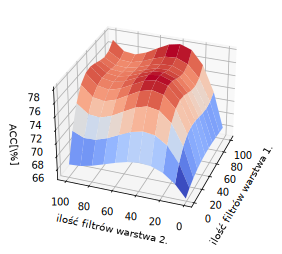

In [30]:
# wykres powierzchniowy
with open('./output_data/acc/filter_size_2.csv') as f:
    X, Y, data_3 = [], [], []
    set_y, size = set(), 0

    for line in f:
        x, y, z = [float(s) for s in line.split(';')]
        set_y.add(y)
        X.append(x)
        Y.append(y)
        data_3.append(z)
    size = len(set_y)

    X = np.array(X)
    Y = np.array(Y)
    # data_3 = np.array(data_3).reshape((size,-1))
    data_3 = np.array(data_3)

    data_1 = X.reshape((-1, size))
    data_2 = Y.reshape((-1, size))

data = np.c_[X, Y, data_3]
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)

Z = polyval2d(data_1, data_2, polyfit2d(data_1.flatten(), data_2.flatten(), data_3))

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel('ilość filtrów warstwa 1.')
plt.ylabel('ilość filtrów warstwa 2.')
ax.set_zlabel('ACC[\%]')
# plt.xticks(np.arange(1, 101, step=10))
# plt.yticks(np.arange(1, 41, step=10))
ax.view_init(elev=30, azim=200)
ax.plot_surface(data_2, data_1,  Z, cmap=cm.coolwarm,
                rstride=1, cstride=1, linewidth=2, antialiased=True)
# ax.scatter(X, Y, data_3, c='r', s=50)
plt.show()
